__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

__часть 3__: решение задачи регресии

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

In [25]:
import numpy as np

## данные

https://scikit-learn.org/stable/datasets.html

https://archive.ics.uci.edu

https://www.openml.org/search?type=data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)


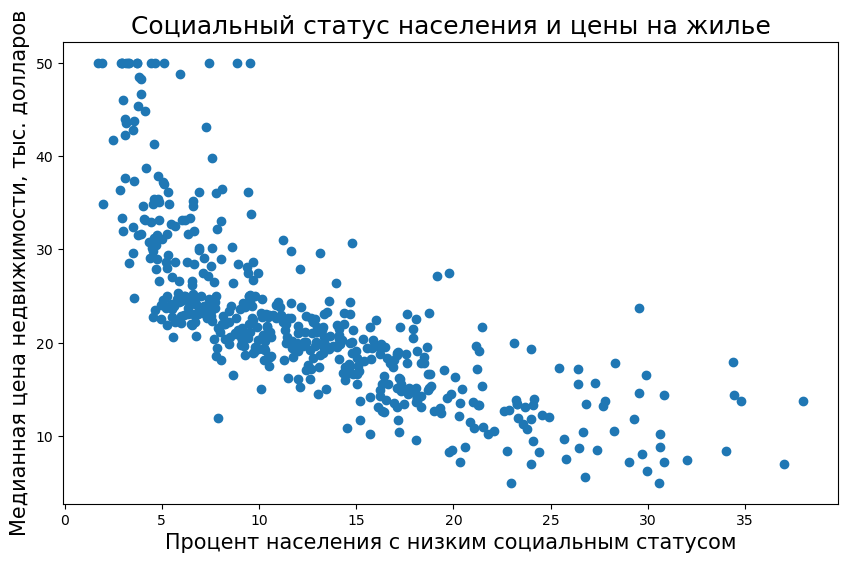

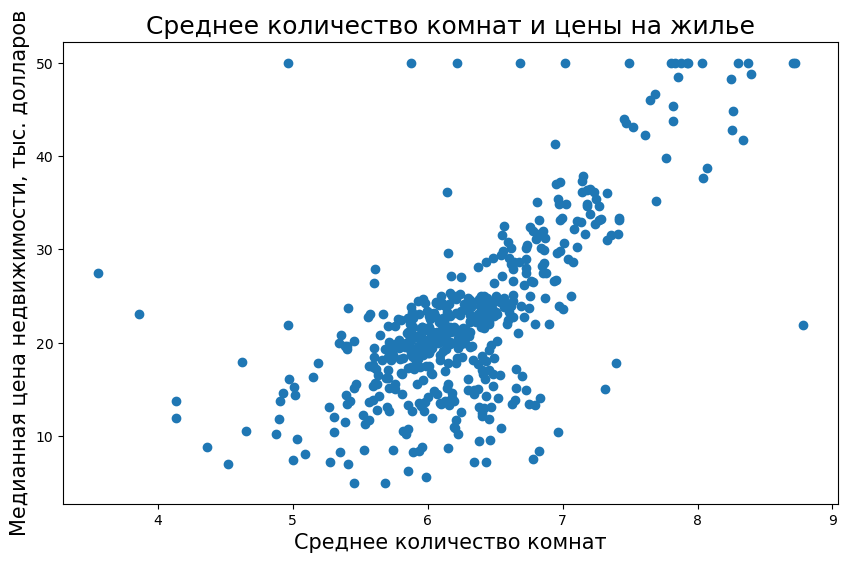

In [21]:
# выбираем один из вариантов

# from sklearn import datasets
# help(datasets)

import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
type(boston)
boston.keys()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()
boston_df['MEDV'] = boston.target
boston_df.describe().round(2)

x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

plt.figure(figsize = (10,6))
plt.scatter(x1, y)
 
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)


# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y)
 
# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)

X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = boston_df['MEDV']



In [29]:
# делим на тестовые и учебные

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# размерность обучающей
print(X_train.shape, y_train.shape)
 
# и тестовой выборки
print(X_test.shape, y_test.shape)

# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
 
# обучим нашу модель
model.fit(X_train, y_train)
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)
 
# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])



(354, 5) (354,)
(152, 5) (152,)
[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


## модель регрессии

In [39]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.6963887820859458


In [ ]:
from sklearn.model_selection import GridSearchCV

## оценка регрессии

In [28]:
# импортируем модуль метрик
from sklearn import metrics
 
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

Root Mean Squared Error (RMSE): 5.107447670220914
R2: 0.65
